In [53]:
import numpy as np
import pandas as pd

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
df.shape

(100000, 4)

In [9]:
df2 = pd.read_csv("Movie_Id_Titles")
df2.shape

(1682, 2)

In [10]:
df2.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [11]:
#merging df, df2 data
reco = pd.merge(df,df2,on='item_id')
reco.head(100)

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
95,485,242,5,891040423,Kolya (1996)
96,574,242,5,891278860,Kolya (1996)
97,758,242,3,880672230,Kolya (1996)
98,486,242,4,879874018,Kolya (1996)


## Exploratory Data Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Average rating and number of ratings:

In [14]:
reco.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
They Made Me a Criminal (1939)                       5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Saint of Fort Washington, The (1993)                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Great Day in Harlem, A (1994)                        5.0
Aiqing wansui (1994)                                 5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Name: rating, dtype: float64

So they are some movies with average rating with 5/5. But basically movie can't get full ratings. Not everyone will give 5/5 right. Someone will give 4.5, 4, 4.7, 4.3, 5 like these. If a movie got 5/5 ratings that means

1. Only few people rated that movie
2. Movie is not so popular
3. Votes counts are very less to that movie

We can't compare a movie with vote counts of 5000 with a movie with 50 vote counts. A movie having 4 avg rating with 5000 vote counts is said to be highly rated than a movie with 5 average rating with 50 vote counts.

There might be any other reason so we just can't relay on average ratings values to decide the best rated movie.

**So take out the movies which are with highest votings(Popular movies)**

In [17]:
reco.groupby('title')['title'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: title, dtype: int64

In [31]:
reco.shape

(100000, 5)

The above movies are most repeated movies in the data that means many users gave rating to that movies. More voting count so that movie is popular movie. 

When we see the avg movie rating list with highest voting list, No movie is in the highest voting list. That means the top avg rated movies having less vote counts.So that movies have count 5 10 like these ratings. Even most popular movies like Star war couldnt get 5/5 ratings. 

In [34]:
#dataframe of movies with avg ratings

ratings = pd.DataFrame(reco.groupby('title')['rating'].mean())
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


Lets See how many votes got to each movie

In [35]:
ratings['num of ratings'] = pd.DataFrame(reco.groupby('title')['rating'].count())
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [36]:
ratings.shape

(1664, 2)

Yeah see the no of votes got for a movie which is in top in avg rating list its only 1 vote that means only 1 user gave voting to that movie and you can observe a movie with 5/5 avg rating have less vote counts.

#### Lets see some distribution plots 

<AxesSubplot:>

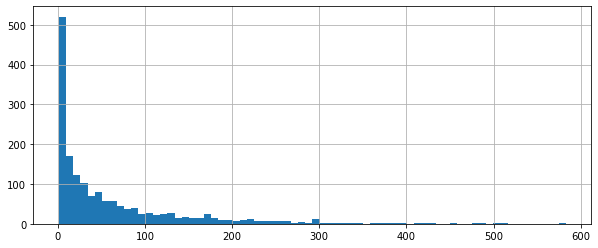

In [37]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

As you observed the distribution it is highly skewed to right. That means most the movies got votes in range 0 - 200 and very less movies got more than 300 votings.

<AxesSubplot:>

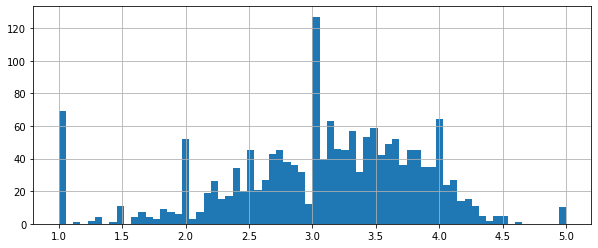

In [38]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

The rating distribution seems tobe normally distributed most of the movies got ratings in range 3 - 4.5. They are some outliers like ratings with 1 and more ratings on 3 and 5.

#### Craeting a joint plot for rating

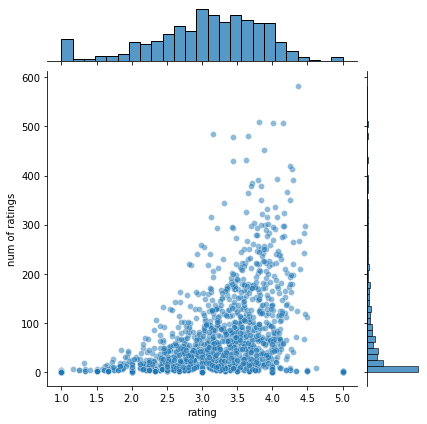

In [39]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

So joint plot will also tell same thing the place where we got high dense that ratings are mostly present in the data.

**Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:**

## Recommending Similar Movies

**Problem Statement** - Basically our goal isto recommend a movies to the users based on the ratings he gave on previously watched and gave rating tothe movie.

So now we will creat a pivot table on user Id which tells us for which movies users gave ratings. If he gave ratings that rating value will present in that movie place. If it is NAN that means user didnt watched the movie or he didnt gave any rating to that movie. So lets create the pivot table.

In [40]:
moviemat = reco.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


So we can alot of NAN values in table so that means user didnt watched the movie or he didnt gave any rating to that movie. We cant see all movies right.

In [41]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Here I'm considering the movies Star Wars and Fargo (Coz I watched these movies). Now with these movies I'm gonna get correlation with pivot table data and try too see which movie gonna recommend after watching these 2 movies

So if a user watched both these films and gave rating so what will be the next movie that our recommend system gonna recommend to that user.

So Lets grab the ratings given for these 2 movies.

In [42]:
starwars_user_ratings = moviemat['Star Wars (1977)']
Fargo_user_ratings = moviemat['Fargo (1996)']

In [44]:
starwars_user_ratings.head(10)

user_id
1     5.0
2     5.0
3     NaN
4     5.0
5     4.0
6     4.0
7     5.0
8     5.0
9     5.0
10    5.0
Name: Star Wars (1977), dtype: float64

So almost every one in top 10 gave ratings to star war movie expect one user id 3 he might not watched the movie.

In [45]:
Fargo_user_ratings.head(10)

user_id
1     5.0
2     5.0
3     NaN
4     NaN
5     5.0
6     5.0
7     5.0
8     NaN
9     NaN
10    5.0
Name: Fargo (1996), dtype: float64

So here 6 users gave ratings in top 10 and 4 users might not watched movie.

From the above 2 movies we considered I'm gonna take correlation with repect to user id.

**We can then use corrwith() method to get correlations between two pandas series:**

In [46]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_Fargo = moviemat.corrwith(Fargo_user_ratings)

C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [47]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True) #dropping nan values 
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


So here we got some movies that our recommender system gonna recommend after watching star war movie to users. The higher correlation movie will be recommended.

Remember here we builded the recommendation system that recommends based on ratings given by users. If movie 1 ratings highly correlates with some other movie 6 ratings so if user watched movie 1 than our recommder system gonna recommend that movie 6 to the user. 

So here there will be a problem as we discussed above there might be movies with 1 or 2 votings that movies may also highly correlates with watched movie so we cant recommend on these bases.

So to avoid that vote count issue I'm gonna consider movies that having more than 100 votings(atleast movie should repeated minimum 100 times in the data) I'm gonna correlates the watched to movie the movies with more than 100 votings.

Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [48]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


**Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).**

In [49]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


**Now sort the values and notice how the titles make a lot more sense:**

In [50]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Now recommender system is perfectly balanced on ratings and popularity.So its gonna recommend according to ratings and popularity to users. If user watched starwar movie those are the next movies recommend to the user.

**Now same to fargo movie**

In [52]:
corr_fargo = pd.DataFrame(similar_to_Fargo,columns=['Correlation'])
corr_fargo.dropna(inplace=True)
corr_fargo = corr_fargo.join(ratings['num of ratings'])
corr_fargo[corr_fargo['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
